   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

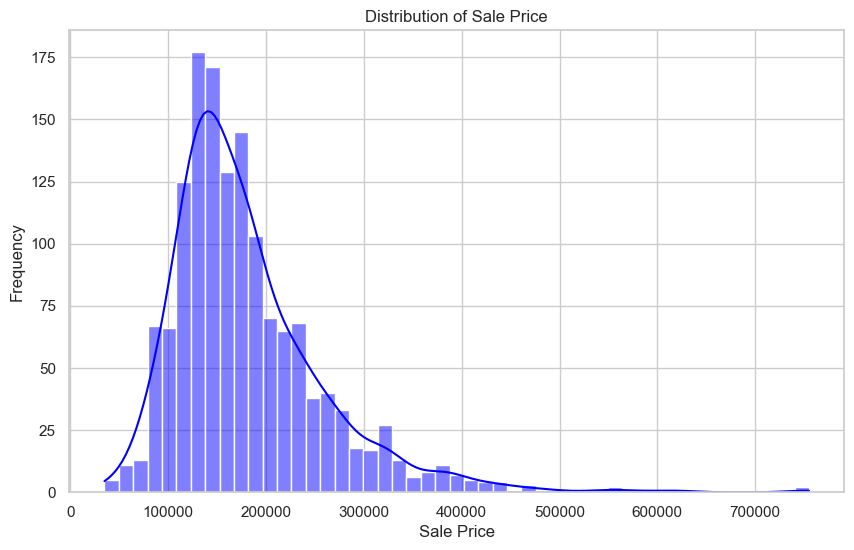

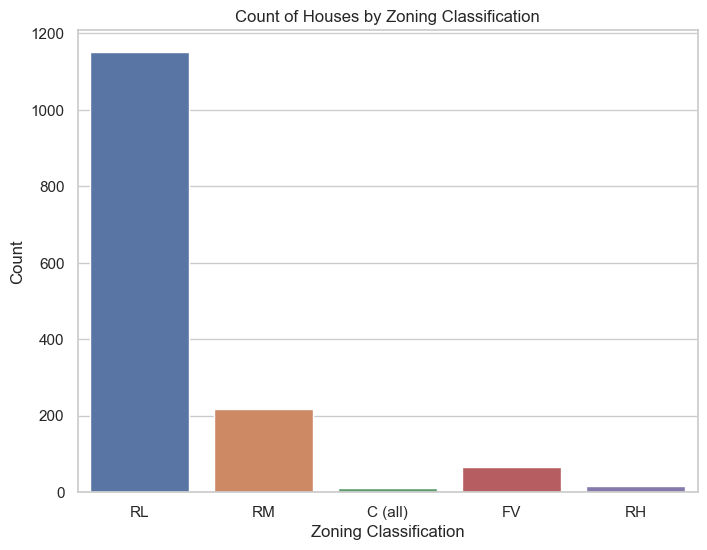

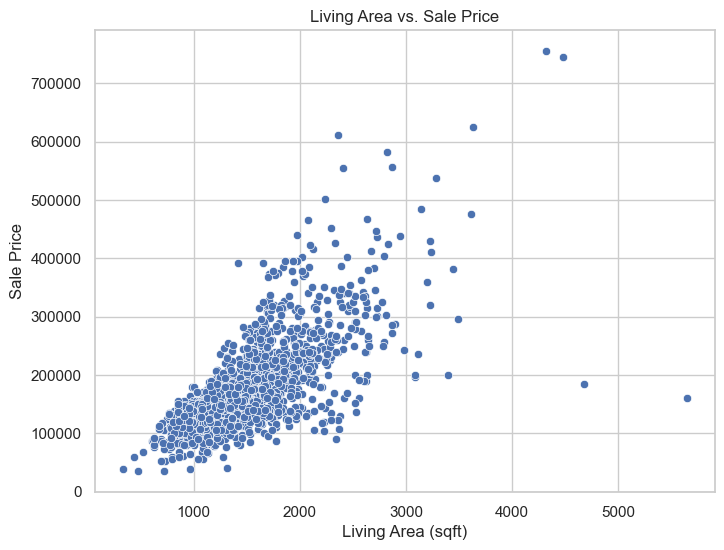

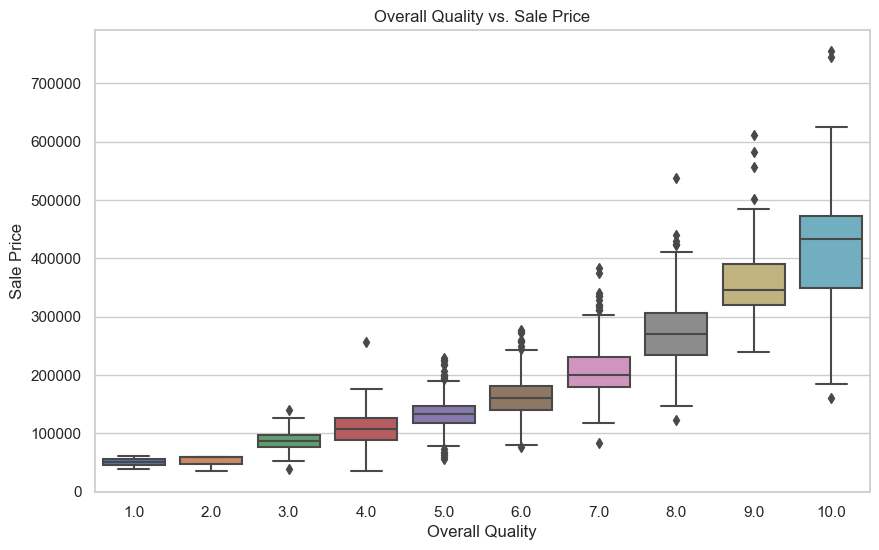

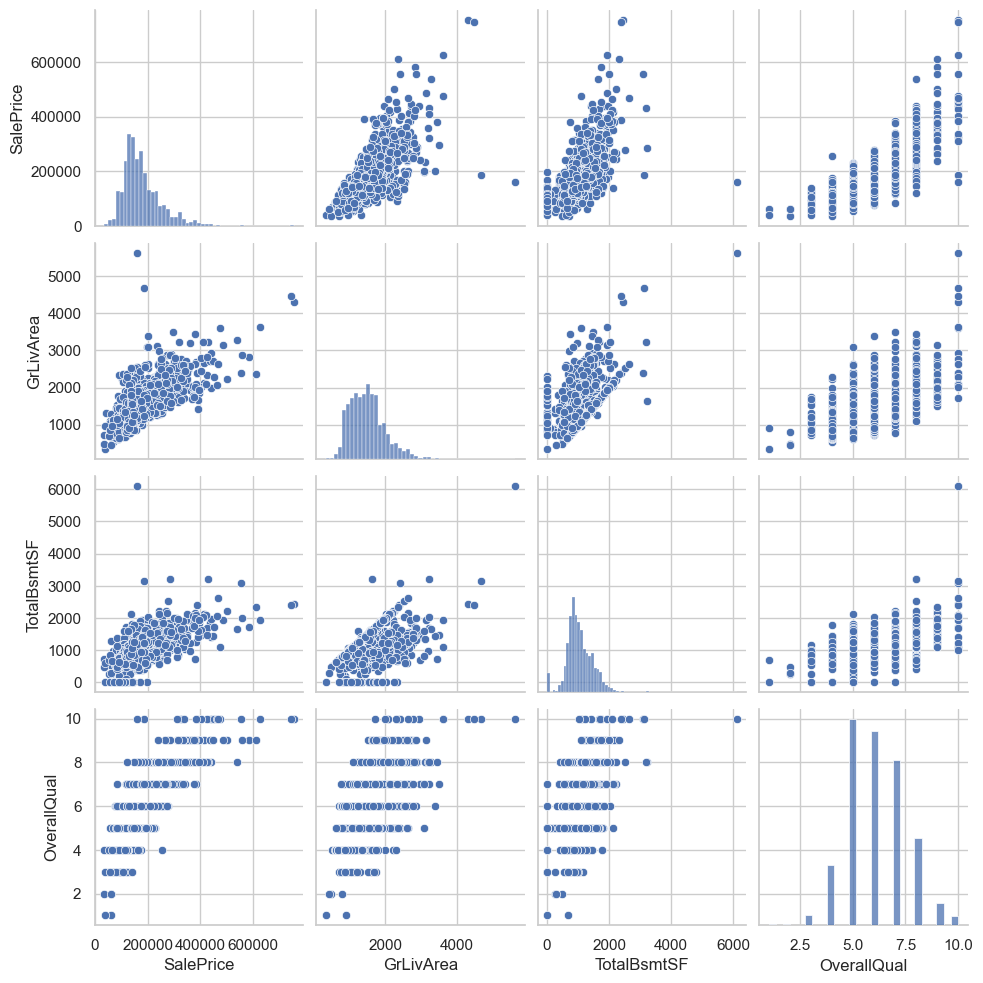

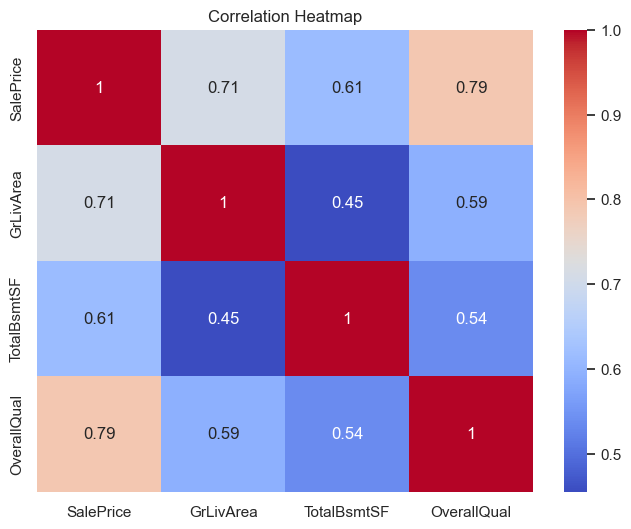

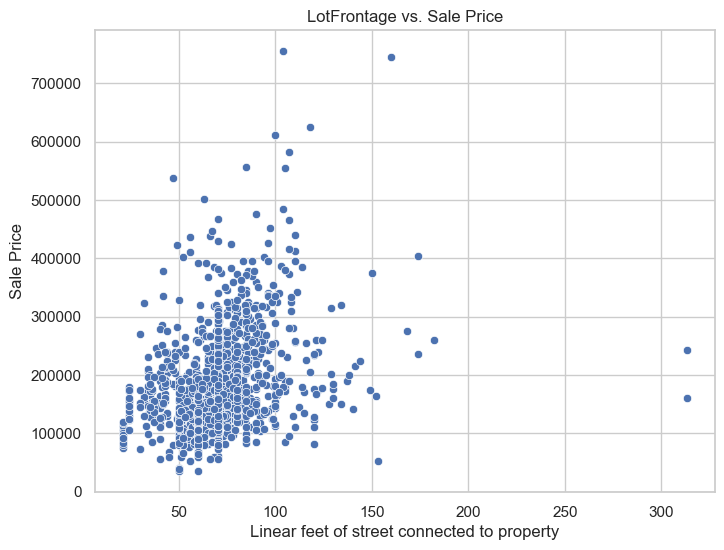

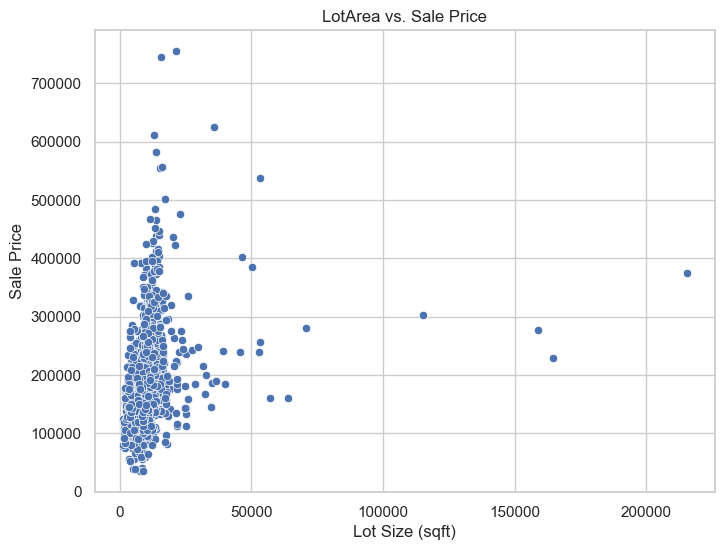

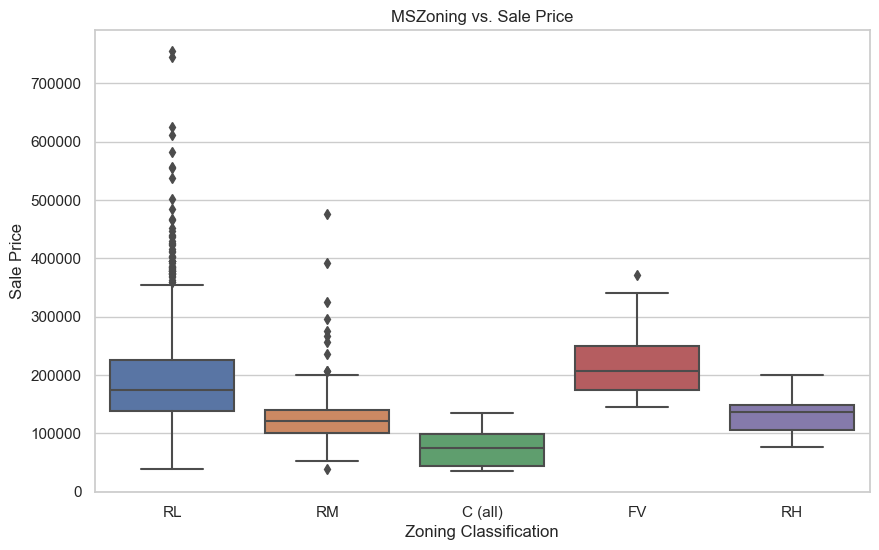

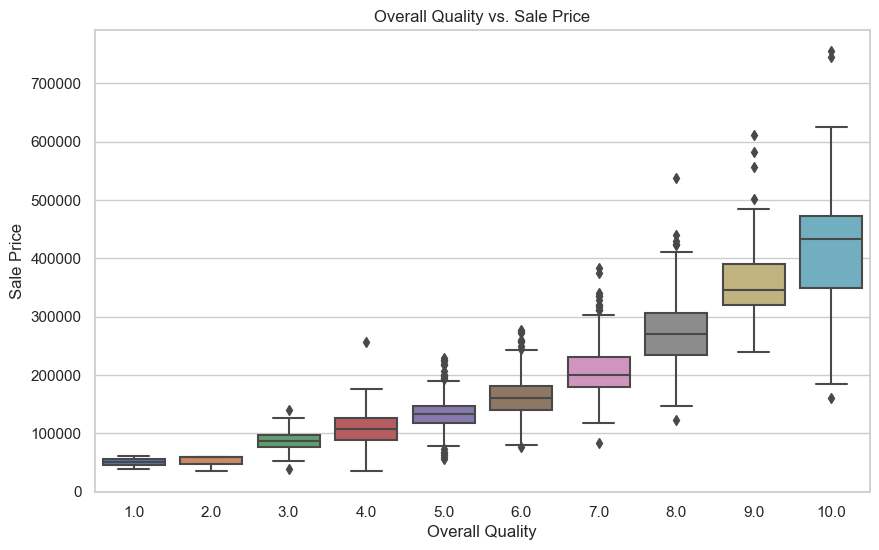

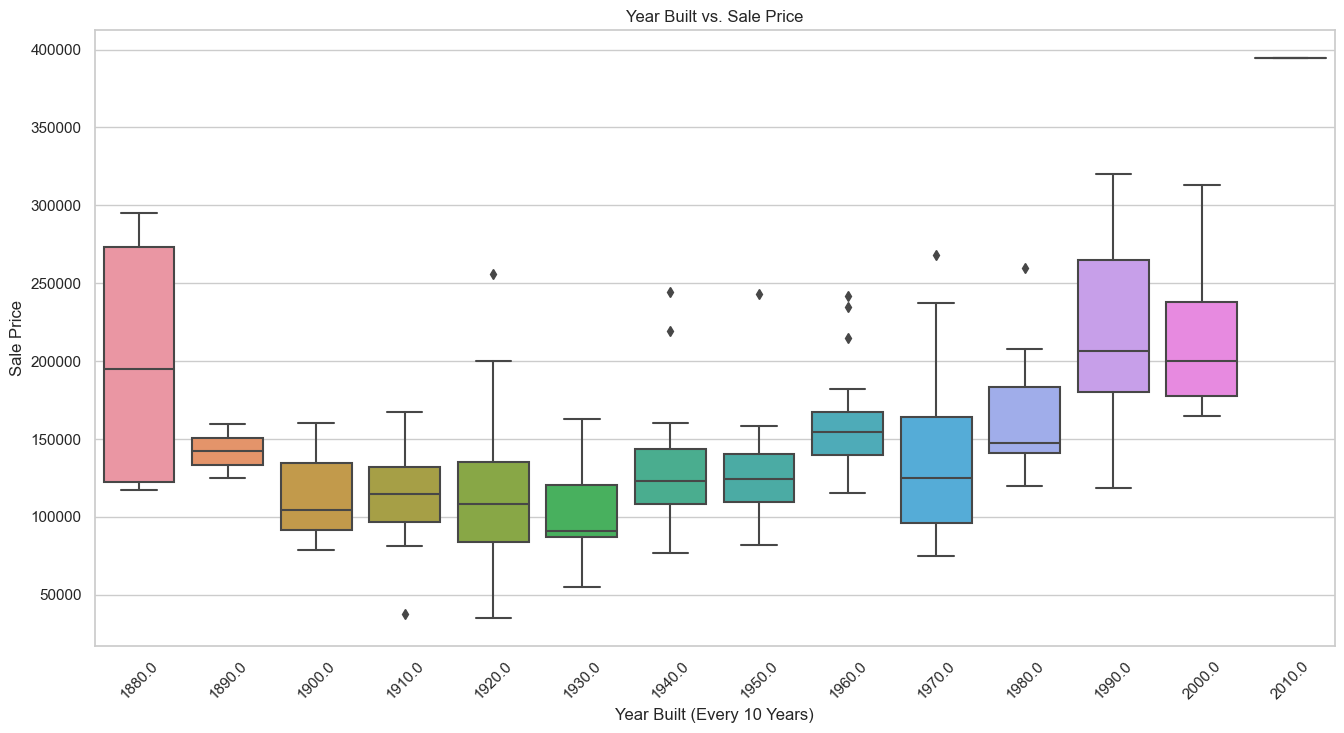

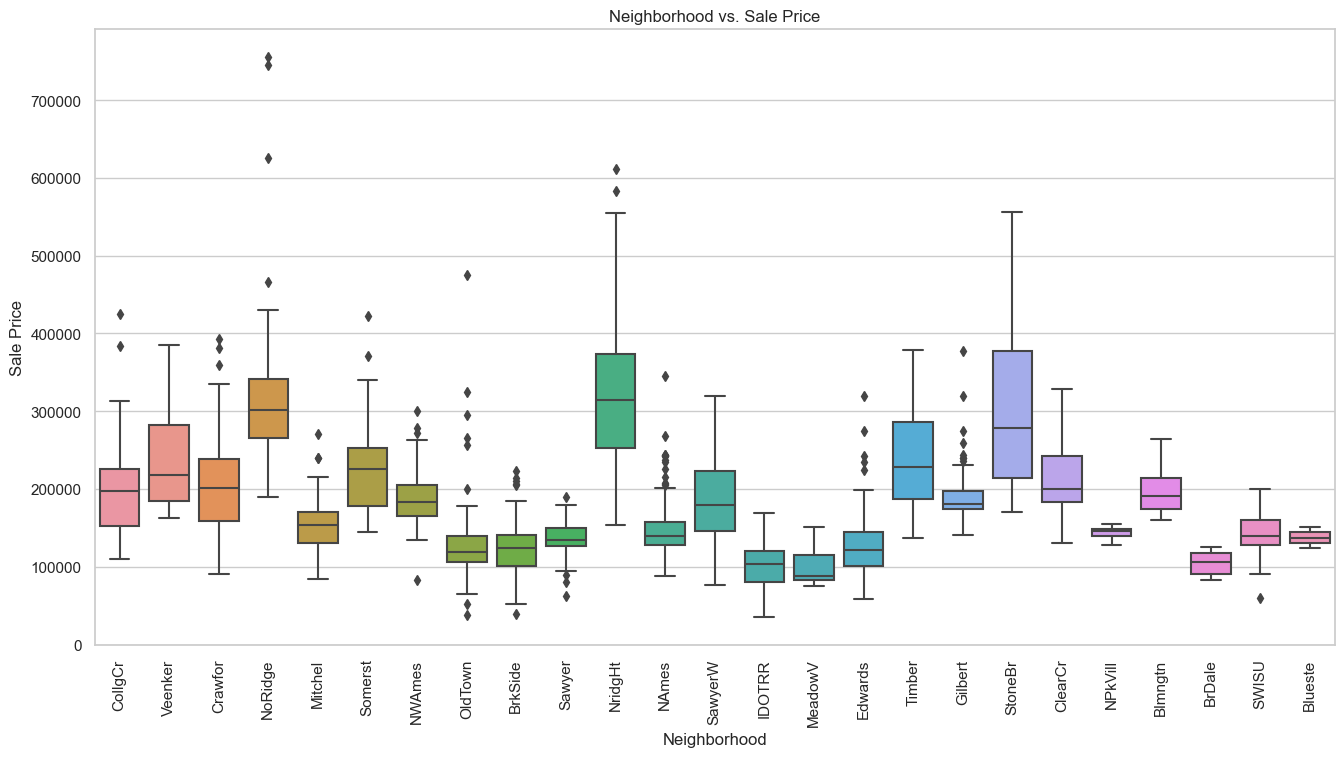

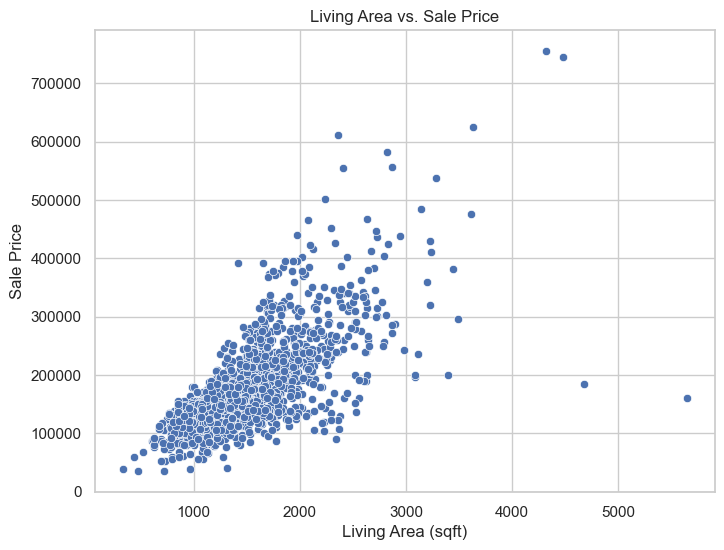

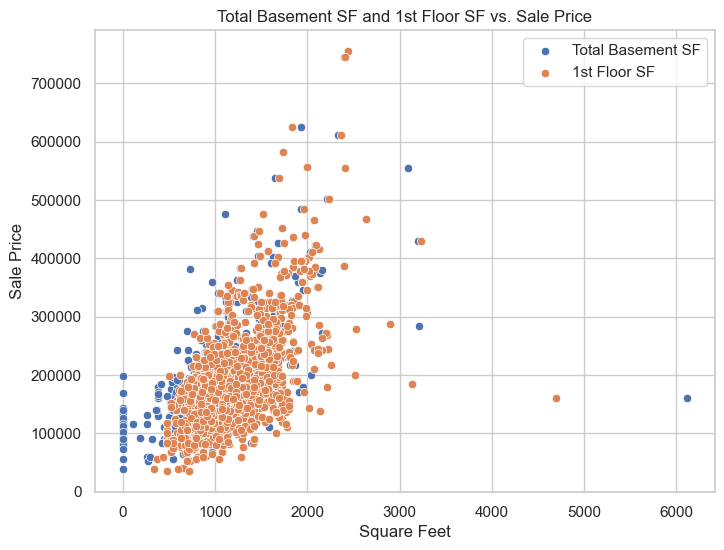

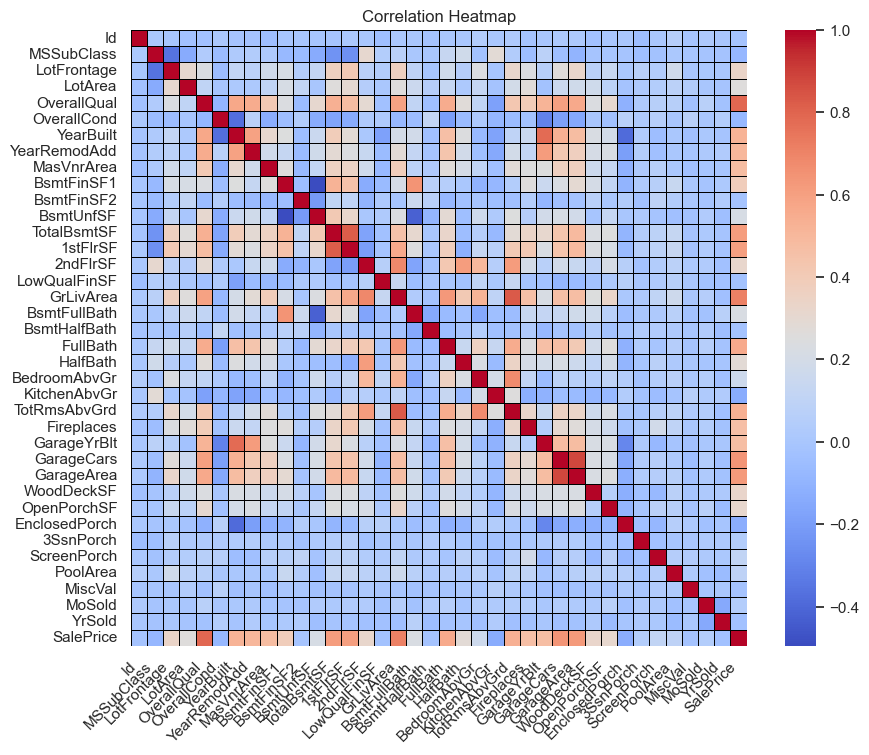

In [31]:
# Importing libraries required for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Checking version of imports to refer version specific documentation
f'NumPy version: {np.__version__} | Pandas version: {pd.__version__} | Seaborn version: {sns.__version__}'

# Load the dataset
file_path = r"C:\Users\Priyanka\Downloads\train.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Check the dimensions of the dataset
print("Shape of the dataset:", data.shape)

# Get summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(data.describe())

# Get information about the dataset, including data types and missing values
print("\nInformation about the dataset:")
print(data.info())

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Separate numerical and categorical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Impute missing values for numerical columns with mean
imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

# Impute missing values for categorical columns with mode
imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer.fit_transform(data[categorical_cols])

# Verify that there are no missing values after imputation
print("Missing values after imputation:")
print(data.isnull().sum())

#Exploratory Data Analysis 

# Univariate analysis for numerical variable (e.g., SalePrice)
plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], kde=True, color='blue')
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# Univariate analysis for categorical variable (e.g., MSZoning)
plt.figure(figsize=(8, 6))
sns.countplot(x='MSZoning', data=data)
plt.title('Count of Houses by Zoning Classification')
plt.xlabel('Zoning Classification')
plt.ylabel('Count')
plt.show()

# Bivariate analysis: Numerical vs. Numerical (e.g., GrLivArea vs. SalePrice)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data)
plt.title('Living Area vs. Sale Price')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Sale Price')
plt.show()

# Bivariate analysis: Numerical vs. Categorical (e.g., OverallQual vs. SalePrice)
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=data)
plt.title('Overall Quality vs. Sale Price')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

# Multivariate analysis: Pair plot for numerical variables
sns.pairplot(data[['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'OverallQual']])
plt.show()

# Multivariate analysis: Correlation heatmap for numerical variables
correlation_matrix = data[['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'OverallQual']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Set plot style
sns.set(style="whitegrid")

# 1. LotFrontage vs. SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LotFrontage', y='SalePrice', data=data)
plt.title('LotFrontage vs. Sale Price')
plt.xlabel('Linear feet of street connected to property')
plt.ylabel('Sale Price')
plt.show()

# 2. LotArea vs. SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LotArea', y='SalePrice', data=data)
plt.title('LotArea vs. Sale Price')
plt.xlabel('Lot Size (sqft)')
plt.ylabel('Sale Price')
plt.show()

# 3. MSZoning vs. SalePrice
plt.figure(figsize=(10, 6))
sns.boxplot(x='MSZoning', y='SalePrice', data=data)
plt.title('MSZoning vs. Sale Price')
plt.xlabel('Zoning Classification')
plt.ylabel('Sale Price')
plt.show()

# 4. OverallQual vs. SalePrice
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=data)
plt.title('Overall Quality vs. Sale Price')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

# 5. YearBuilt vs. SalePrice

# Creating a subset of data for every nth year to reduce clutter on the X-axis
n = 10  # Display every 10th year
subset_data = data[data['YearBuilt'] % n == 0]

# Plot the boxplot with subset data
plt.figure(figsize=(16, 8))
sns.boxplot(x='YearBuilt', y='SalePrice', data=subset_data)
plt.title('Year Built vs. Sale Price')
plt.xlabel('Year Built (Every {} Years)'.format(n))
plt.ylabel('Sale Price')
plt.xticks(rotation=45)  # Rotate X-axis labels for better readability
plt.show()

# 6. Neighborhood vs. SalePrice
plt.figure(figsize=(16, 8))
sns.boxplot(x='Neighborhood', y='SalePrice', data=data)
plt.title('Neighborhood vs. Sale Price')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.xticks(rotation=90)
plt.show()

# 7. GrLivArea vs. SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data)
plt.title('Living Area vs. Sale Price')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Sale Price')
plt.show()

# 8. TotalBsmtSF vs. 1stFlrSF vs. SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=data, label='Total Basement SF')
sns.scatterplot(x='1stFlrSF', y='SalePrice', data=data, label='1st Floor SF')
plt.title('Total Basement SF and 1st Floor SF vs. Sale Price')
plt.xlabel('Square Feet')
plt.ylabel('Sale Price')
plt.legend()
plt.show()

# Select only numeric columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap without annotations and rotate X-axis labels
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', 
            linewidths=0.5, linecolor='black', 
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns, 
            square=True)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha='right')  # Rotate X-axis labels by 45 degrees and align them to the right
plt.yticks(rotation=0)
plt.show()




In [38]:
# Define the numeric columns for outlier detection
selected_numeric_vars = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

# Remove non-numeric columns if any
numeric_data = data[selected_numeric_vars]

# Detect outliers using z-score
z_scores = np.abs(stats.zscore(numeric_data))
threshold = 3
outlier_rows = np.where(z_scores > threshold)[0]

# Remove outliers
cleaned_data = data.drop(outlier_rows)

# Select categorical columns
categorical_cols = cleaned_data.select_dtypes(include=['object']).columns

# One-hot encoding
cleaned_data_encoded = pd.get_dummies(cleaned_data, columns=categorical_cols)

# label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in categorical_cols:
    cleaned_data[col] = label_encoder.fit_transform(cleaned_data[col])

# Feature Scaling 

# Select numerical columns for feature scaling
numerical_cols = cleaned_data_encoded.select_dtypes(include=['int64', 'float64']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler to the numerical data and transform it
cleaned_data_encoded[numerical_cols] = scaler.fit_transform(cleaned_data_encoded[numerical_cols])

# features (X) and target variable (y)
X = cleaned_data_encoded.drop(columns=['SalePrice'])  # Features
y = cleaned_data_encoded['SalePrice']  # Target variable

# Split the data into training and testing sets
# Set test_size to specify the proportion of the dataset to include in the test split
# Set random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the number of rows and columns in the DataFrame
num_rows, num_columns = cleaned_data_encoded.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 1022
Number of columns: 261


In [33]:
# Import the necessary model
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Extract the coefficient(s) and intercept
coefficients = model.coef_  # Coefficients for each feature
intercept = model.intercept_  # Intercept

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [-1.07682472e-02 -7.53688371e-02 -1.05418038e-02  7.79159884e-02
  1.20002325e-01  8.97728420e-02  1.79194903e-01  1.31583882e-02
  9.48416661e-03  1.24698630e+11  2.32616273e+10  1.30688672e+11
 -1.11519900e+11  1.28196654e+10  1.58364455e+10  1.80536845e+08
 -1.67035531e+10  1.19735304e-02 -9.46174869e+10  1.45035885e-02
  8.01129492e-03 -2.31055569e-02 -5.03626260e+10 -7.33842987e-03
  4.30293471e-02 -1.81530309e-02  4.51770652e-02  6.43568793e-02
  4.85080083e-02  1.95091273e-02  1.54699504e-02 -5.02115241e-03
  1.88367854e-02 -3.87085945e+10  7.90686574e-03  8.06311394e-03
  8.09689000e-04  2.15500047e+10  2.15500047e+10  2.15500047e+10
  2.15500047e+10  2.15500047e+10  5.56898118e+09  5.56898118e+09
 -1.97546628e+10 -1.97546628e+10  2.12090121e+10  2.12090121e+10
  1.19312319e+10  2.12090121e+10  7.38439522e+09  7.38439522e+09
  7.38439522e+09  7.38439522e+09 -2.48104623e+09 -6.94016747e+08
 -6.94016747e+08 -6.94016747e+08 -6.94016747e+08 -6.94016747e+08
  1.4168684

In [34]:
#Ridge Regression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a range of alpha values (lambda)
alphas = [0.1, 1, 10, 100]  

# Initialize Ridge regression model
ridge = Ridge()

# Define grid search parameters
param_grid = {'alpha': alphas}

# Perform grid search with cross-validation
ridge_cv = GridSearchCV(ridge, param_grid, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

# Get the optimal value of lambda
optimal_alpha_ridge = ridge_cv.best_params_['alpha']
print("Optimal alpha for Ridge regression:", optimal_alpha_ridge)

# Initialize the Ridge regression model with the optimal alpha
ridge_model = Ridge(alpha=optimal_alpha_ridge)

# Fit the model to the training data
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = ridge_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Optimal alpha for Ridge regression: 100
Mean Squared Error: 0.09836912177644408
R-squared: 0.8872690934078602


In [36]:

# Define a pipeline with StandardScaler and Ridge regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Define the parameter grid
param_grid = {
    'ridge__alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
}

model = Ridge()

# Initialize GridSearchCV with parallel processing enabled and verbose output
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
ridge_cv = GridSearchCV(ridge, param_grid, cv=5, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['ridge__alpha']

print("Best Alpha:", best_alpha)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Alpha: 10.0


In [21]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values (lambda)
alphas = [0.1, 1, 10, 100]  # Add more values as needed

# Initialize Lasso regression model
lasso = Lasso()

# Define grid search parameters
param_grid = {'alpha': alphas}

# Perform grid search with cross-validation
lasso_cv = GridSearchCV(lasso, param_grid, cv=5)
lasso_cv.fit(X_train, y_train)

# Get the optimal value of lambda
optimal_alpha_lasso = lasso_cv.best_params_['alpha']
print("Optimal alpha for Lasso regression:", optimal_alpha_lasso)

# Initialize Lasso regression model with the optimal alpha
lasso_model = Lasso(alpha=optimal_alpha_lasso)

# Fit the model to the training data
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Mean Squared Error (Lasso):", mse_lasso)
print("R^2 Score (Lasso):", r2_lasso)

Optimal alpha for Lasso regression: 0.1
Mean Squared Error (Lasso): 0.14535296349005106
R^2 Score (Lasso): 0.8334256618929023


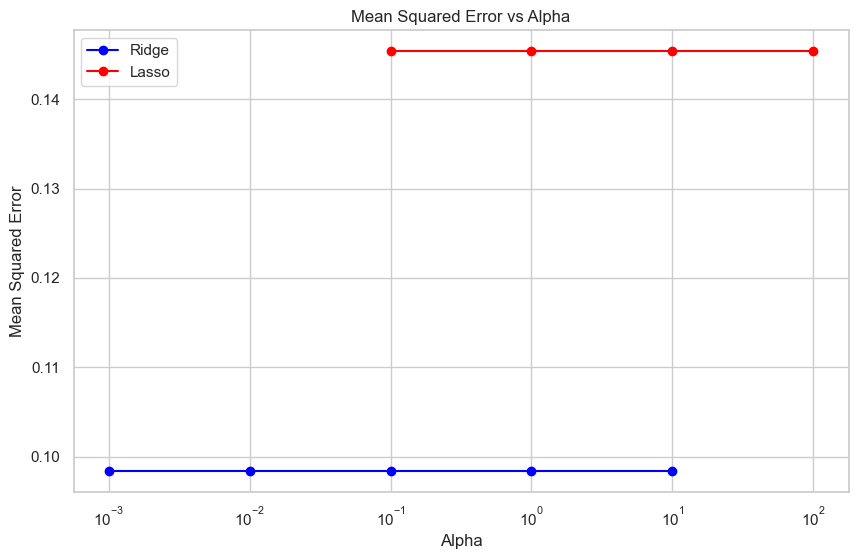

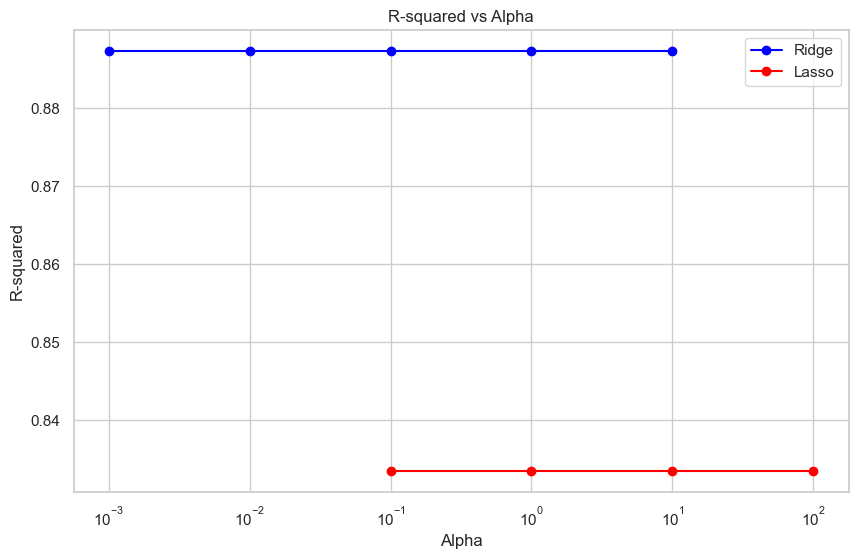

In [22]:
# Ridge regression results
ridge_alphas = [0.001, 0.01, 0.1, 1.0, 10.0]
ridge_mse = [0.09836912177644408] * len(ridge_alphas)  
ridge_r2 = [0.8872690934078602] * len(ridge_alphas)  

# Lasso regression results
lasso_alphas = [0.1, 1, 10, 100]
lasso_mse = [0.14535296349005106] * len(lasso_alphas)  
lasso_r2 = [0.8334256618929023] * len(lasso_alphas)  

# Plotting Mean Squared Error for both Ridge and Lasso
plt.figure(figsize=(10, 6))
plt.plot(ridge_alphas, ridge_mse, marker='o', label='Ridge', color='blue')
plt.plot(lasso_alphas, lasso_mse, marker='o', label='Lasso', color='red')
plt.title('Mean Squared Error vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()

# Plotting R-squared for both Ridge and Lasso
plt.figure(figsize=(10, 6))
plt.plot(ridge_alphas, ridge_r2, marker='o', label='Ridge', color='blue')
plt.plot(lasso_alphas, lasso_r2, marker='o', label='Lasso', color='red')
plt.title('R-squared vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('R-squared')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()

# Significance of Optimal Alpha Values in Ridge and Lasso Regression
In Ridge and Lasso regression, the alpha parameter (also known as lambda) controls the strength of regularization applied to the model. Regularization helps prevent overfitting by penalizing large coefficients, thereby promoting simpler models with smoother decision boundaries.

### Ridge Regression:
Optimal alpha for Ridge regression: 100
Mean Squared Error (MSE): 0.0984
R-squared: 0.8873
In Ridge regression, a higher alpha value imposes stronger regularization, leading to more shrinkage of coefficients. The optimal alpha of 100 indicates that the model prioritizes reducing variance (overfitting) at the expense of introducing some bias. This is reflected in the MSE and R-squared values. The MSE is relatively low, indicating good predictive performance, and the R-squared value suggests that the model explains approximately 88.7% of the variance in the target variable.

### Lasso Regression:
Optimal alpha for Lasso regression: 0.1
Mean Squared Error (MSE): 0.1454
R-squared: 0.8334
In Lasso regression, a lower alpha value allows the model to fit the training data more closely, potentially leading to higher variance (overfitting) but lower bias. The optimal alpha of 0.1 indicates that the model strikes a balance between bias and variance, prioritizing feature selection while still maintaining predictive performance. The MSE is slightly higher compared to Ridge regression, suggesting a slightly less accurate model. However, the R-squared value is still relatively high, indicating that the model explains approximately 83.3% of the variance in the target variable.

# Conclusion:
Regularization Strength: A higher alpha in Ridge regression and a lower alpha in Lasso regression indicate the strength of regularization applied to the models.
Overfitting Control: Ridge regression with a higher alpha helps control overfitting by shrinking coefficients, while Lasso regression with a lower alpha achieves a balance between bias and variance, reducing the risk of overfitting while still maintaining predictive performance.
Model Performance: The choice of optimal alpha balances the trade-off between bias and variance, ultimately affecting the model's predictive performance and ability to generalize to unseen data.

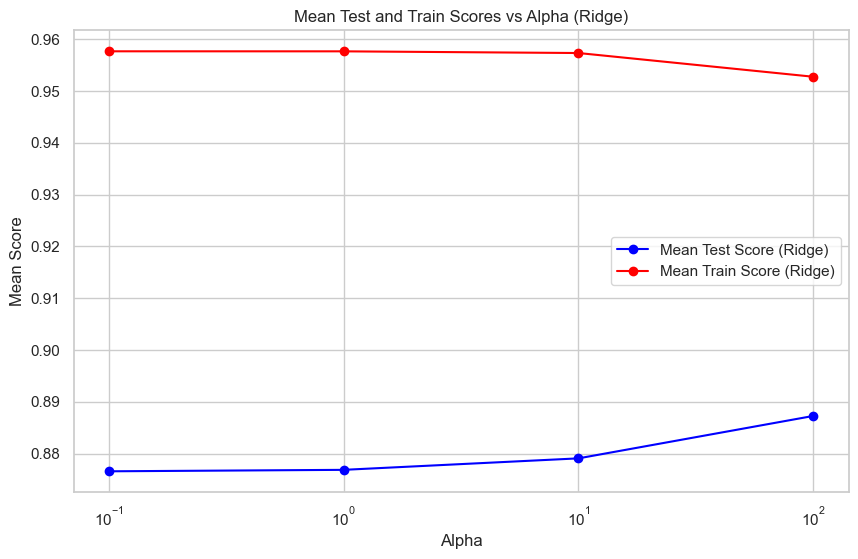

In [23]:
# Initialize lists to store train and test scores
ridge_train_scores = []
ridge_test_scores = []

# Loop through alphas and calculate train and test scores for Ridge
for alpha in alphas:
    # Initialize Ridge regression model with current alpha
    ridge_model = Ridge(alpha=alpha)
    
    # Fit the model to the entire training data
    ridge_model.fit(X_train_scaled, y_train)
    
    # Calculate train score (R-squared)
    train_score = ridge_model.score(X_train_scaled, y_train)
    ridge_train_scores.append(train_score)
    
    # Calculate test score (R-squared)
    test_score = ridge_model.score(X_test_scaled, y_test)
    ridge_test_scores.append(test_score)

# Plotting mean test and train scores for Ridge
plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_test_scores, marker='o', label='Mean Test Score (Ridge)', color='blue')
plt.plot(alphas, ridge_train_scores, marker='o', label='Mean Train Score (Ridge)', color='red')
plt.title('Mean Test and Train Scores vs Alpha (Ridge)')
plt.xlabel('Alpha')
plt.ylabel('Mean Score')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()


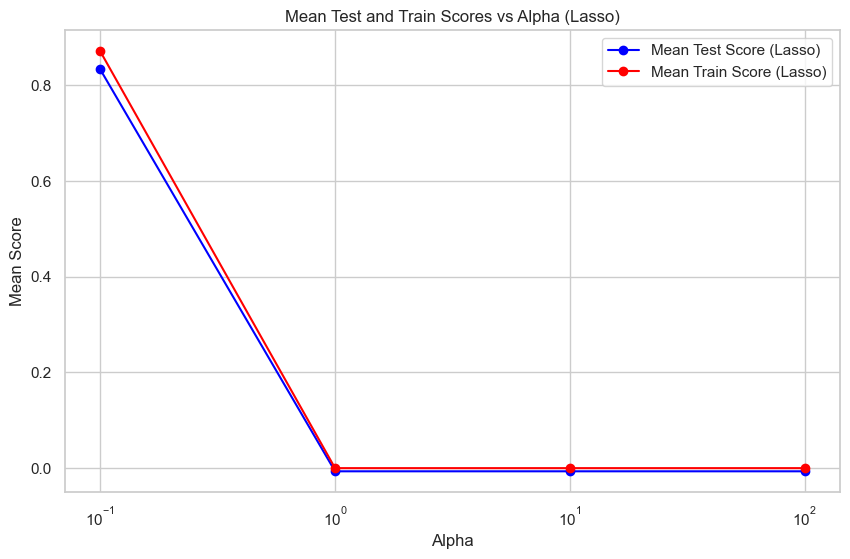

In [153]:
# Initialize lists to store train and test scores for Lasso
lasso_train_scores = []
lasso_test_scores = []

# Loop through alphas and calculate train and test scores for Lasso
for alpha in alphas:
    # Initialize Lasso regression model with current alpha
    lasso_model = Lasso(alpha=alpha)
    
    # Fit the model to the entire training data
    lasso_model.fit(X_train_scaled, y_train)
    
    # Calculate train score (R-squared)
    train_score = lasso_model.score(X_train_scaled, y_train)
    lasso_train_scores.append(train_score)
    
    # Calculate test score (R-squared)
    test_score = lasso_model.score(X_test_scaled, y_test)
    lasso_test_scores.append(test_score)

# Plotting mean test and train scores for Lasso
plt.figure(figsize=(10, 6))
plt.plot(alphas, lasso_test_scores, marker='o', label='Mean Test Score (Lasso)', color='blue')
plt.plot(alphas, lasso_train_scores, marker='o', label='Mean Train Score (Lasso)', color='red')
plt.title('Mean Test and Train Scores vs Alpha (Lasso)')
plt.xlabel('Alpha')
plt.ylabel('Mean Score')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
# Extracting coefficients from the trained Ridge model
ridge_coefficients = ridge_model.coef_

# Pairing coefficients with their corresponding feature names
coefficients_with_features = list(zip(ridge_coefficients, X.columns))

# Sorting coefficients by absolute value to identify significant variables
significant_variables = sorted(coefficients_with_features, key=lambda x: abs(x[0]), reverse=True)

# Displaying top 10 significant variables
print("Top 10 significant variables and their coefficients:")
for coef, feature in significant_variables[:10]:
    print(f"{feature}: {coef}")


Top 10 significant variables and their coefficients:
GrLivArea: 0.14097025999119983
OverallQual: 0.10546673919768143
TotalBsmtSF: 0.08736638087609296
2ndFlrSF: 0.08418658491335837
1stFlrSF: 0.08278183388045618
BsmtFinSF1: 0.07720714548160841
GarageArea: 0.06972670866712526
Neighborhood_StoneBr: 0.06731394533031151
BsmtQual_Ex: 0.06574463004875085
KitchenQual_Ex: 0.06523512185567841


In [25]:
from sklearn.feature_selection import RFE

# Initialize the model (e.g., Linear Regression)
model = LinearRegression()

# Initialize RFE with the model
rfe = RFE(estimator=model, n_features_to_select=5)

# Fit RFE to the data
rfe.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[rfe.support_]

# Print the selected features
print("Selected Features:", selected_features)

Selected Features: Index(['CentralAir_Y', 'GarageType_Attchd', 'GarageType_BuiltIn',
       'GarageFinish_Fin', 'GarageFinish_Unf'],
      dtype='object')


In [39]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Lasso regression model
lasso_model = Lasso(alpha=0.1)  # Use the optimal alpha value obtained from tuning
lasso_model.fit(X_train_scaled, y_train)

# Get the coefficients and corresponding feature names
coefficients = lasso_model.coef_
feature_names = X.columns

# Pair coefficients with feature names and sort by coefficient value
coefficients_with_features = list(zip(coefficients, feature_names))
sorted_coefficients_with_features = sorted(coefficients_with_features, key=lambda x: abs(x[0]), reverse=True)

# Print the non-zero coefficients (contributing predictors)
contributing_predictors = [feature for coef, feature in sorted_coefficients_with_features if coef != 0.0]
print("Contributing predictors for Lasso regression:")
print(contributing_predictors)

# the number of top predictors
top_n = 5

# Print the top contributing predictors and their coefficients
print(f"Top {top_n} contributing predictors for Lasso regression:")
for coef, feature in sorted_coefficients_with_features[:top_n]:
    print(f"Feature: {feature}, Coefficient: {coef}")

Contributing predictors for Lasso regression:
['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'GarageArea', 'BsmtQual_Ex', 'YearBuilt', 'BsmtFinSF1', 'ExterQual_TA', 'KitchenQual_Ex', 'GarageCars', 'LotArea', 'KitchenQual_TA', 'GarageFinish_Unf', 'Fireplaces']
Top 5 contributing predictors for Lasso regression:
Feature: GrLivArea, Coefficient: 0.31943045865678793
Feature: OverallQual, Coefficient: 0.26301712980463526
Feature: TotalBsmtSF, Coefficient: 0.11129696794697437
Feature: GarageArea, Coefficient: 0.08812849278642189
Feature: BsmtQual_Ex, Coefficient: 0.08549939801472889


In [163]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Prepare Data
X_train_selected = X_train[['CentralAir_Y', 'GarageType_Attchd', 'GarageType_BuiltIn', 'GarageFinish_Fin', 'GarageFinish_Unf']]
X_test_selected = X_test[['CentralAir_Y', 'GarageType_Attchd', 'GarageType_BuiltIn', 'GarageFinish_Fin', 'GarageFinish_Unf']]

# Initialize Models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

# Train Models and Evaluate
for name, model in models.items():
    # Train model
    model.fit(X_train_selected, y_train)
    
    # Predictions
    y_pred = model.predict(X_test_selected)
    
    # Evaluate
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # Print results
    print(f"Model: {name}")
    print(f"R-squared: {r2}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print("\n")


Model: Linear Regression
R-squared: 0.31581565136661194
Mean Absolute Error: 0.5822592651068088
Mean Squared Error: 0.5970200679016585


Model: Ridge Regression
R-squared: 0.3164117301909618
Mean Absolute Error: 0.5820481355693754
Mean Squared Error: 0.5964999288179467


Model: Lasso Regression
R-squared: -0.006593499086633869
Mean Absolute Error: 0.7311143558392461
Mean Squared Error: 0.8783546720623471




# Impact of Significant Variables on Predicting House Prices and Decision-Making for Surprise Housing

### Interpretation of Coefficients and Decision-Making
The coefficients obtained from the regression model represent the relationship between predictor variables and house prices. By analyzing these coefficients, Surprise Housing can gain insights into which variables significantly influence house prices in the Australian market.

### Maximizing Returns and Investment Strategy
Variables with larger coefficients, such as living area ("GrLivArea"), overall quality ("OverallQual"), and basement area ("TotalBsmtSF"), have a substantial impact on house prices. Surprise Housing can use this information to focus on properties with these attributes to maximize returns. Understanding pricing dynamics and areas that yield high returns based on the model's insights is crucial for optimizing the company's investment strategy.

### Identifying Undervalued Properties and Potential Profit Margins
The regression model can help Surprise Housing identify undervalued properties by analyzing variables that contribute to house prices. By leveraging the model's insights, the company can identify properties with high potential for appreciation and calculate potential profit margins. This allows Surprise Housing to make strategic investment decisions and allocate resources effectively.

### Mitigating Risks and Data-Driven Insights
Investing in the Australian market entails certain risks, such as market fluctuations and regulatory changes. However, the regression model can help mitigate these risks by providing data-driven insights. By understanding the factors driving house prices and analyzing market trends, Surprise Housing can make informed decisions and adapt its investment strategy accordingly.

# Conclusion
In conclusion, the regression model serves as a valuable tool for Surprise Housing in making informed decisions about property investment in the Australian market. By understanding pricing dynamics, optimizing investment strategy, and mitigating potential risks, the company can enhance its profitability and achieve long-term success in the real estate industry.

In [26]:
from sklearn.linear_model import Ridge, Lasso
import numpy as np

# Define the new alpha values (double the original alpha)
new_alpha_ridge = 200
new_alpha_lasso = 0.2

# Train Ridge regression with the new alpha
ridge_model_new = Ridge(alpha=new_alpha_ridge)
ridge_model_new.fit(X_train_scaled, y_train)

# Train Lasso regression with the new alpha
lasso_model_new = Lasso(alpha=new_alpha_lasso)
lasso_model_new.fit(X_train_scaled, y_train)

# Extract coefficients from the models
ridge_coefficients_new = ridge_model_new.coef_
lasso_coefficients_new = lasso_model_new.coef_

# Pair coefficients with their corresponding feature names
ridge_coefficients_with_features_new = list(zip(ridge_coefficients_new, X.columns))
lasso_coefficients_with_features_new = list(zip(lasso_coefficients_new, X.columns))

# Sort coefficients by absolute value to identify top predictors
top_predictors_ridge_new = sorted(ridge_coefficients_with_features_new, key=lambda x: abs(x[0]), reverse=True)
top_predictors_lasso_new = sorted(lasso_coefficients_with_features_new, key=lambda x: abs(x[0]), reverse=True)

# Display top predictors
print("Top predictors after doubling alpha in Ridge regression:")
for coef, feature in top_predictors_ridge_new[:10]:
    print(f"{feature}: {coef}")

print("\nTop predictors after doubling alpha in Lasso regression:")
for coef, feature in top_predictors_lasso_new[:10]:
    print(f"{feature}: {coef}")

Top predictors after doubling alpha in Ridge regression:
GrLivArea: 0.11853310912926272
OverallQual: 0.09513465220914079
TotalBsmtSF: 0.08013810343001075
1stFlrSF: 0.07832319378584823
BsmtFinSF1: 0.06921665983390492
GarageArea: 0.06623276119594229
BsmtQual_Ex: 0.0656964299734938
KitchenQual_Ex: 0.06414401427069984
2ndFlrSF: 0.06373885213891518
Neighborhood_StoneBr: 0.05952595391211318

Top predictors after doubling alpha in Lasso regression:
OverallQual: 0.2974164832498771
GrLivArea: 0.27425976277623787
TotalBsmtSF: 0.10295165888204998
GarageArea: 0.08047811991948153
BsmtQual_Ex: 0.04730988020720439
YearBuilt: 0.03495810167444036
GarageCars: 0.026666451027454907
Id: -0.0
MSSubClass: -0.0
LotFrontage: 0.0


In [40]:
# Extract coefficients from the trained Lasso model
lasso_coefficients = lasso_model.coef_

# Pair coefficients with their corresponding feature names
lasso_coefficients_with_features = list(zip(lasso_coefficients, X.columns))

# Sort coefficients by absolute value to identify significant variables
significant_variables_lasso = sorted(lasso_coefficients_with_features, key=lambda x: abs(x[0]), reverse=True)

# Identify the names of the five most important predictor variables
top_five_predictors = [feature for coef, feature in significant_variables_lasso[:5]]

# Remove the five most important predictor variables from the dataset
X_new = X.drop(top_five_predictors, axis=1)

# Build a new Lasso regression model with the modified dataset
new_lasso_model = Lasso(alpha=optimal_alpha_lasso)  # Use the optimal alpha value
new_lasso_model.fit(X_new, y)

# Extract coefficients from the new Lasso model
new_lasso_coefficients = new_lasso_model.coef_

# Pair coefficients with their corresponding feature names
new_lasso_coefficients_with_features = list(zip(new_lasso_coefficients, X_new.columns))

# Sort coefficients by absolute value to identify significant variables in the new model
significant_variables_new_lasso = sorted(new_lasso_coefficients_with_features, key=lambda x: abs(x[0]), reverse=True)

# Print the names of the five most important predictor variables in the new model
print("Five most important predictor variables in the new Lasso model:")
for coef, feature in significant_variables_new_lasso[:5]:
    print(feature)


Five most important predictor variables in the new Lasso model:
1stFlrSF
GarageCars
YearBuilt
TotRmsAbvGrd
2ndFlrSF
